# ARIMA Forecasting Models

**A**uto-**R**egressive Integrated Moving Average models are effective tools for forecasting timeseries data. ARIMA modes are popular because they effectively model time series data by capturing both the autoregressive (AR) and moving average (MA) components, while also addressing non-stationarity through differencing (I). This combination makes ARIMA models especially flexible, which is why they are used across very different industries, like finance and weather prediction.

## Stationarity

_The distribution of the time series data does not change with time_. Modelling a timeseries _requires_ that the data are stationary. Stationarity has 3 components:

### Zero Trend

The average trend of the data is neither positive nor negative.



/tmp/ipykernel_112358/1807820481.py:38: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axes[1].plot(date_range, p(time_index), color='#4CAF50', linestyle='-', linewidth=2, label=f'Trend Line (Slope: {z[0]:.4f})')


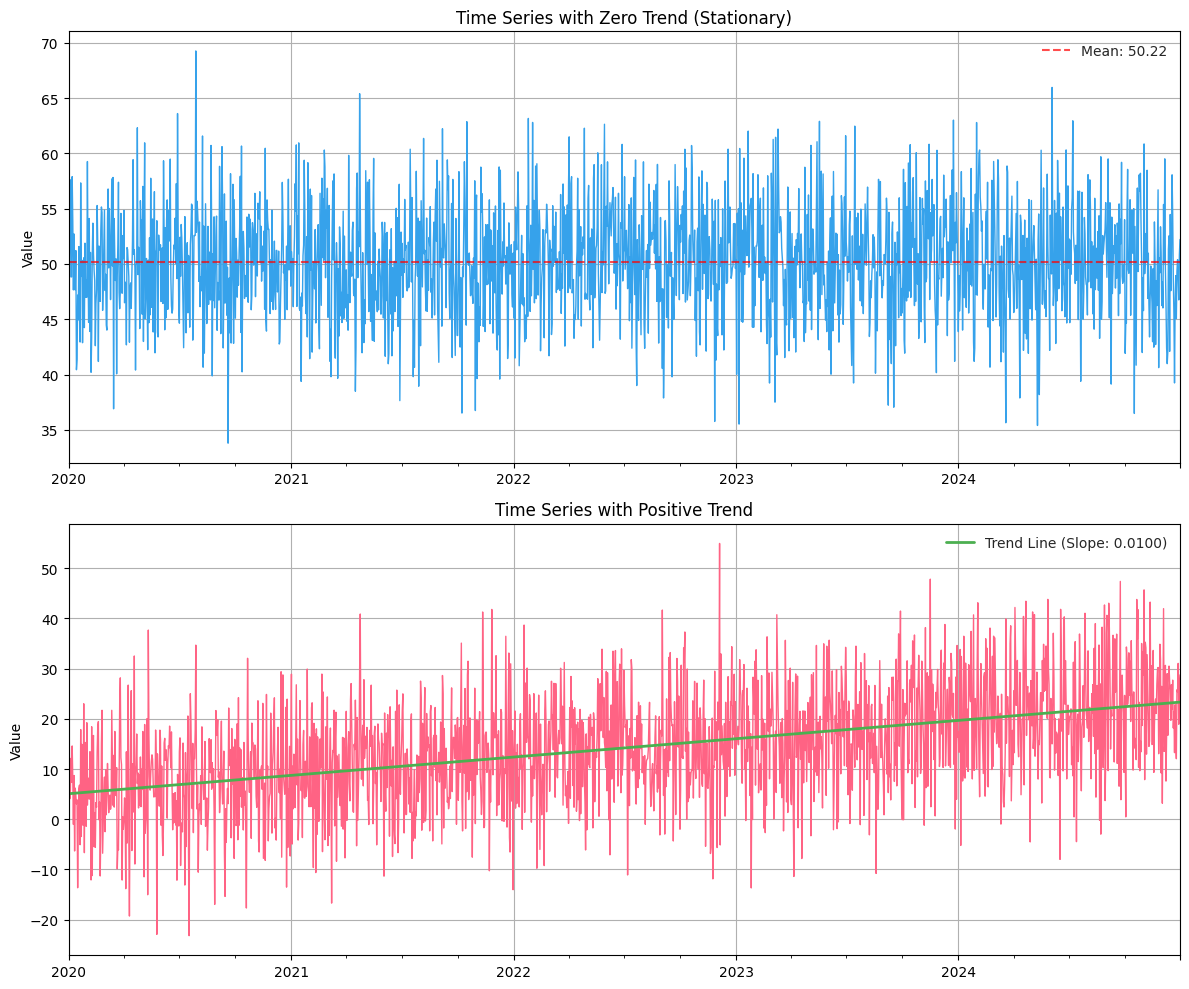

--- Zero Trend Data Head ---
2020-01-01    52.483571
2020-01-02    49.308678
2020-01-03    53.238443
2020-01-04    57.615149
2020-01-05    48.829233
Freq: D, dtype: float64

--- Positive Trend Data Head ---
2020-01-01    -5.903991
2020-01-02    19.119324
2020-01-03     4.034119
2020-01-04     5.218496
2020-01-05    12.122144
Freq: D, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Date Range 
date_range = pd.date_range(start='2020-01-01', periods=1826, freq='D')

# Create Time Series Data with Zero Trend (Stationary)
np.random.seed(42) # for reproducibility
zero_trend_data = 50 + np.random.normal(loc=0, scale=5, size=len(date_range))
ts_zero_trend = pd.Series(zero_trend_data, index=date_range)

# This series is modeled as an increasing line (t/100) plus random noise (std=10).
time_index = np.arange(len(date_range))
positive_trend_data = (time_index / 100) + np.random.normal(loc=5, scale=10, size=len(date_range))
ts_positive_trend = pd.Series(positive_trend_data, index=date_range)

# Create a single figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.style.use('seaborn-v0_8-darkgrid')

# --- Plot 1: Zero Trend ---
ts_zero_trend.plot(ax=axes[0], title='Time Series with Zero Trend (Stationary)', color='#36A2EB', linewidth=1)
axes[0].set_ylabel('Value')
# Add a horizontal line to visualize the constant mean
axes[0].axhline(ts_zero_trend.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {ts_zero_trend.mean():.2f}')
axes[0].legend()

# --- Plot 2: Positive Trend ---
ts_positive_trend.plot(ax=axes[1], title='Time Series with Positive Trend', color='#FF6384', linewidth=1)
axes[1].set_ylabel('Value')
# Add a trend line (simple linear regression for visualization)
z = np.polyfit(time_index, ts_positive_trend.values, 1)
p = np.poly1d(z)
axes[1].plot(date_range, p(time_index), color='#4CAF50', linestyle='-', linewidth=2, label=f'Trend Line (Slope: {z[0]:.4f})')
axes[1].legend()

# Adjust layout to prevent subplot titles and labels from overlapping
plt.tight_layout()
plt.show()

# --- 5. Display DataFrame Heads for Reference ---
print("--- Zero Trend Data Head ---")
print(ts_zero_trend.head())
print("\n--- Positive Trend Data Head ---")
print(ts_positive_trend.head())


## The Components of ARIMA

### Auto Regressive

Put simply, future values are modelled as dependent on past values. An auto-regressive model uses lagged time values of an outcome variable ($y$) as _predictors_ of $y$ at time $t$. 

$$
y_t = \beta_0 + \beta_1y_{t-1} + \beta_2y_{t-2} + \dots + \beta_ny_{t-n} + \epsilon
$$

## ARIMA Term Definitions

* **Trend**: The average slope over a given time period
* **Seasonality**: Patterns of variation that repeat across fixed periods (e.g., daily, weekly, etc.)
* **Cyclicality**: A repeating pattern of variation but without a fixed period
* **White Noise**: A series whose values have a mean of zero, constant variance (maybe), and are not auto-correlated across time
